In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats

In [5]:
loans = pd.read_csv('../data/loans_full_schema.csv')

In [6]:
loans.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

In [8]:
loans['application_type'].value_counts(normalize=True)

individual    0.8505
joint         0.1495
Name: application_type, dtype: float64

<Figure size 864x576 with 0 Axes>

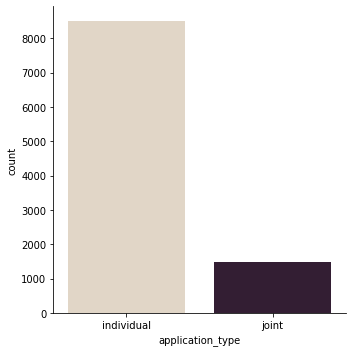

In [9]:
plt.figure(figsize = (12,8))
sns.catplot(x="application_type", kind="count", palette="ch:.25", data=loans)

### Point Estimate

$\hat{p} = 0.85$

In [10]:
point_est = .85

In [11]:
n = loans['application_type'].size

In [12]:
n

10000

**95% confidence interval for a Parameter**


${\hat{p}} \pm 1.96 \times SE{\hat{p}}$

$SE{\hat{p}} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

**success-failure condition**


$n{\hat{p}}  \ge 10\\$
$n(1 - {\hat{p}}) \ge 10$

In [13]:
point_est = .85

In [14]:
n = loans['application_type'].size

In [15]:
n

10000

In [16]:
# success-failure condition
print(n * point_est)
print(n * (1 - point_est))

8500.0
1500.0000000000002


In [17]:
std_err = math.sqrt((point_est * (1 - point_est)) / n)

In [18]:
point_est - 1.96 * std_err, point_est + 1.96 * std_err

(0.843001400140028, 0.856998599859972)

### confidence interval using any confidence level

${\hat{p}} \pm z^* \times SE{\hat{p}}$

### margin of error

$z^* \times SE{\hat{p}}$

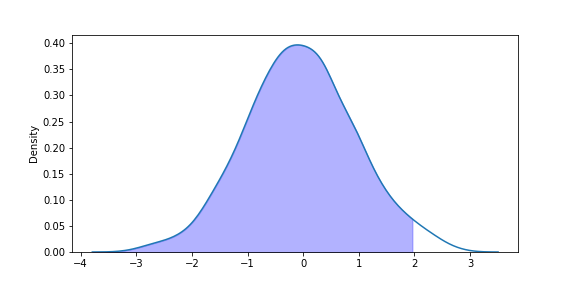

In [38]:
# 95% confidence

# total area = confidence region + remaining area / 2
confidence = .95
total_area = confidence + (1 - confidence)/2
print(total_area)

0.975


In [24]:
# z_score = 1.96

### Normal probability table

https://math.dartmouth.edu/~m10s18/Exam/probability%20tables.pdf